In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans


In [43]:
# meyiapkan data dan memangil data set
dataset = pd.read_csv('./../../data/XAUUSD_2010-2023.csv')
print(dataset)

                       time     open     high      low    close  rsi14  \
0       2010-01-03 18:00:00  1098.45  1100.00  1098.05  1099.95  81.98   
1       2010-01-03 18:05:00  1100.00  1100.30  1099.45  1099.75  79.17   
2       2010-01-03 18:10:00  1099.70  1100.10  1099.30  1099.45  75.02   
3       2010-01-03 18:15:00  1099.50  1099.60  1098.50  1099.45  75.02   
4       2010-01-03 18:20:00  1099.40  1099.60  1098.90  1098.90  67.50   
...                     ...      ...      ...      ...      ...    ...   
985999  2023-12-29 16:35:00  2063.07  2063.24  2062.60  2062.96  39.44   
986000  2023-12-29 16:40:00  2062.95  2063.09  2062.52  2062.61  37.12   
986001  2023-12-29 16:45:00  2062.60  2062.83  2062.34  2062.56  36.79   
986002  2023-12-29 16:50:00  2062.56  2063.20  2062.51  2062.54  36.65   
986003  2023-12-29 16:55:00  2062.52  2063.00  2062.37  2062.73  39.05   

          sma14  
0       1096.38  
1       1096.72  
2       1097.03  
3       1097.30  
4       1097.50  
...

In [44]:
dataset.keys()

Index(['time', 'open', 'high', 'low', 'close', 'rsi14', 'sma14'], dtype='object')

In [52]:
dataku = pd.DataFrame(dataset)
dataset=dataku.head(1000)

In [53]:
# konverksi ke data array
dataset = dataset[['open','close']]
dataset

,open,close
0,1098.45,1099.95
1,1100.00,1099.75
2,1099.70,1099.45
3,1099.50,1099.45
4,1099.40,1098.90
...,...,...
995,1131.73,1131.05
996,1131.03,1130.05
997,1130.28,1130.25
998,1130.23,1130.10


In [54]:
x = np.asarray(dataset)
print(x)

[[1098.45 1099.95]
 [1100.   1099.75]
 [1099.7  1099.45]
 ...
 [1130.28 1130.25]
 [1130.23 1130.1 ]
 [1130.18 1129.33]]


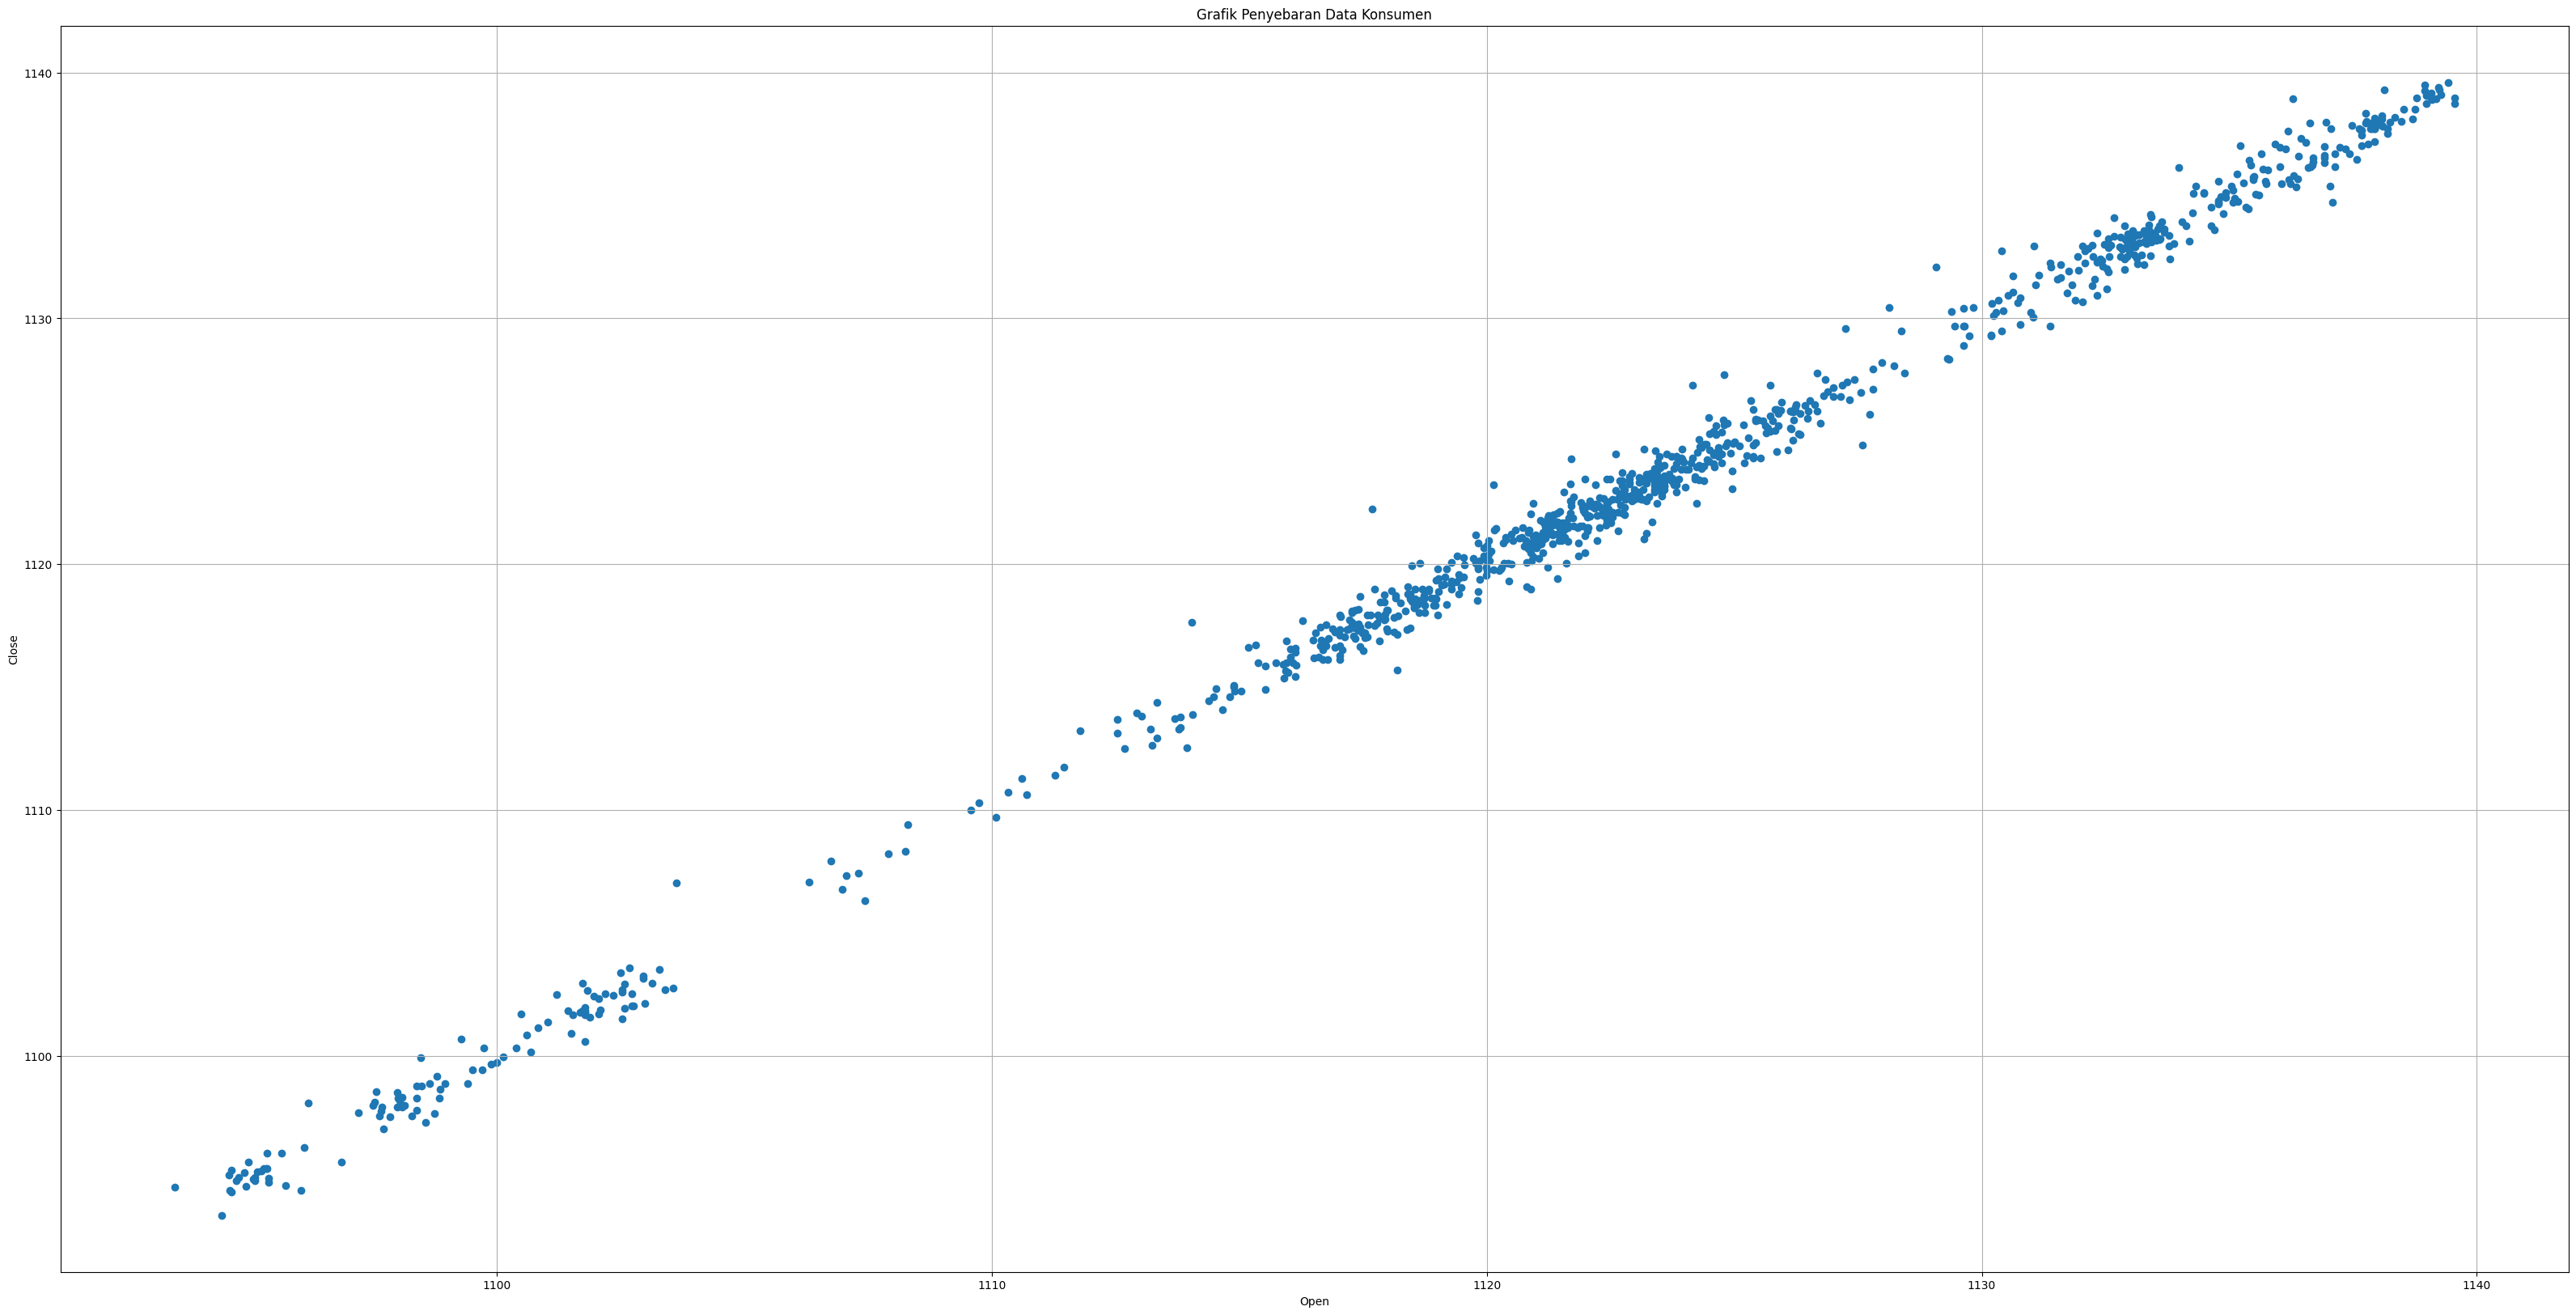

In [69]:
# menampilkan data dalam bentuk scatter plot

plt.figure(figsize=(40,20))
plt.scatter(
    x[:, 0],
    x[:, 1],
    label='True Position')
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Grafik Penyebaran Data Konsumen')
plt.grid()
plt.show()

In [56]:
# Mengakrtifkan K mean dengan jumlah K=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [58]:
# menampilkan nilai centroid yang di generate oleh algoritma 
print(kmeans.cluster_centers_)

[[1125.20809195 1125.22585057]
 [1100.77761538 1100.89330769]]


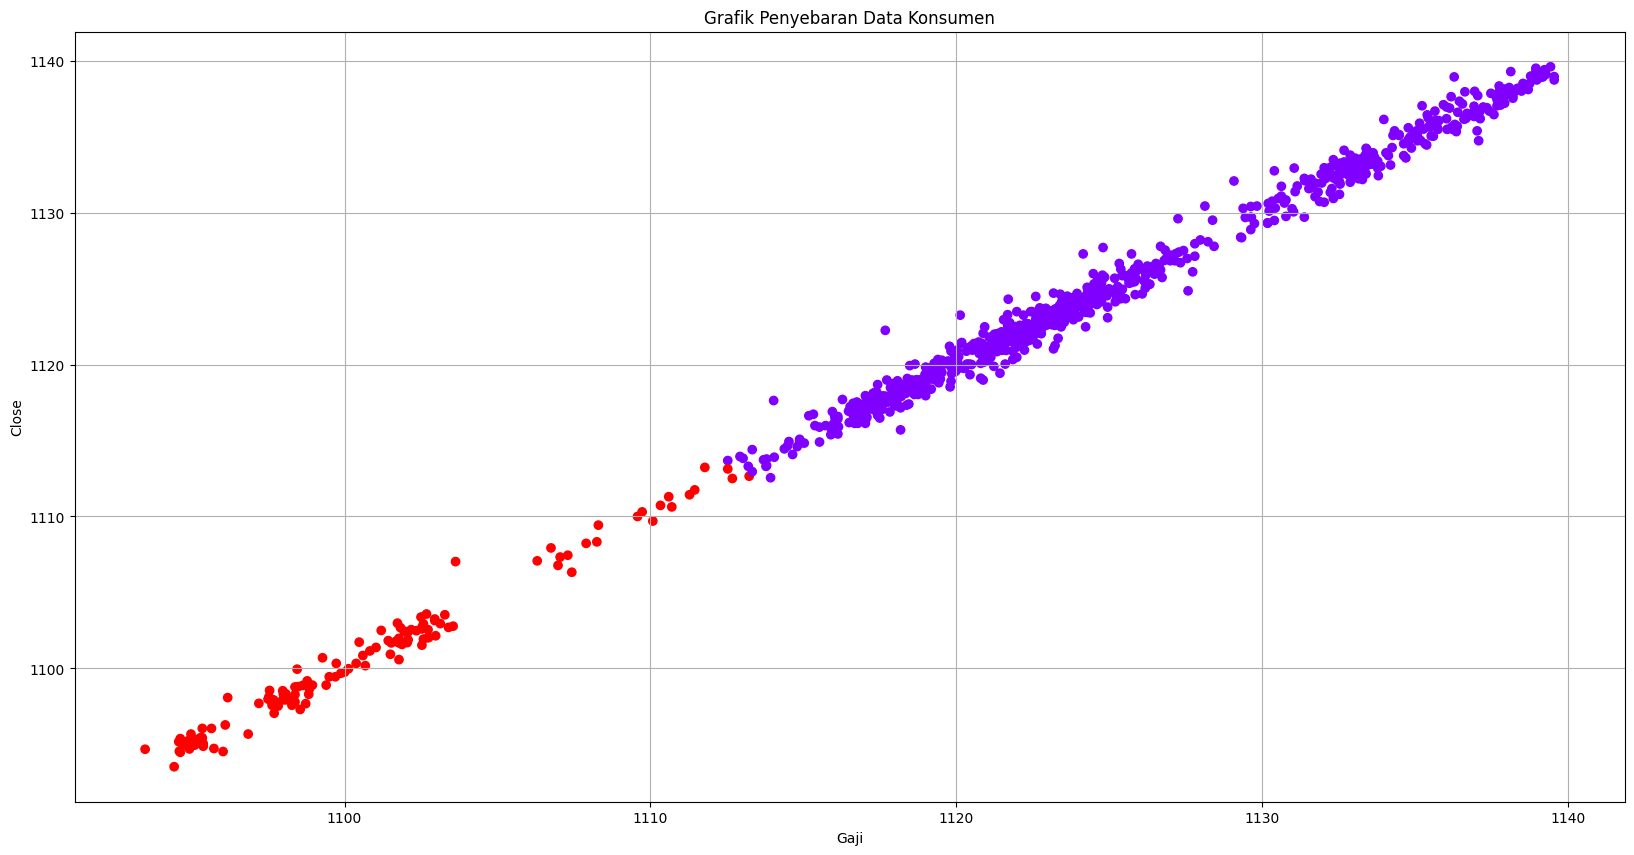

In [67]:
#plot Data point
plt.figure(figsize=(20,10))
plt.scatter(
    x[:, 0],
    x[:, 1],
    c=kmeans.labels_,
    cmap='rainbow'
)
plt.xlabel('Gaji')
plt.ylabel('Close')
plt.title('Grafik Penyebaran Data Konsumen')
plt.grid()
plt.show()

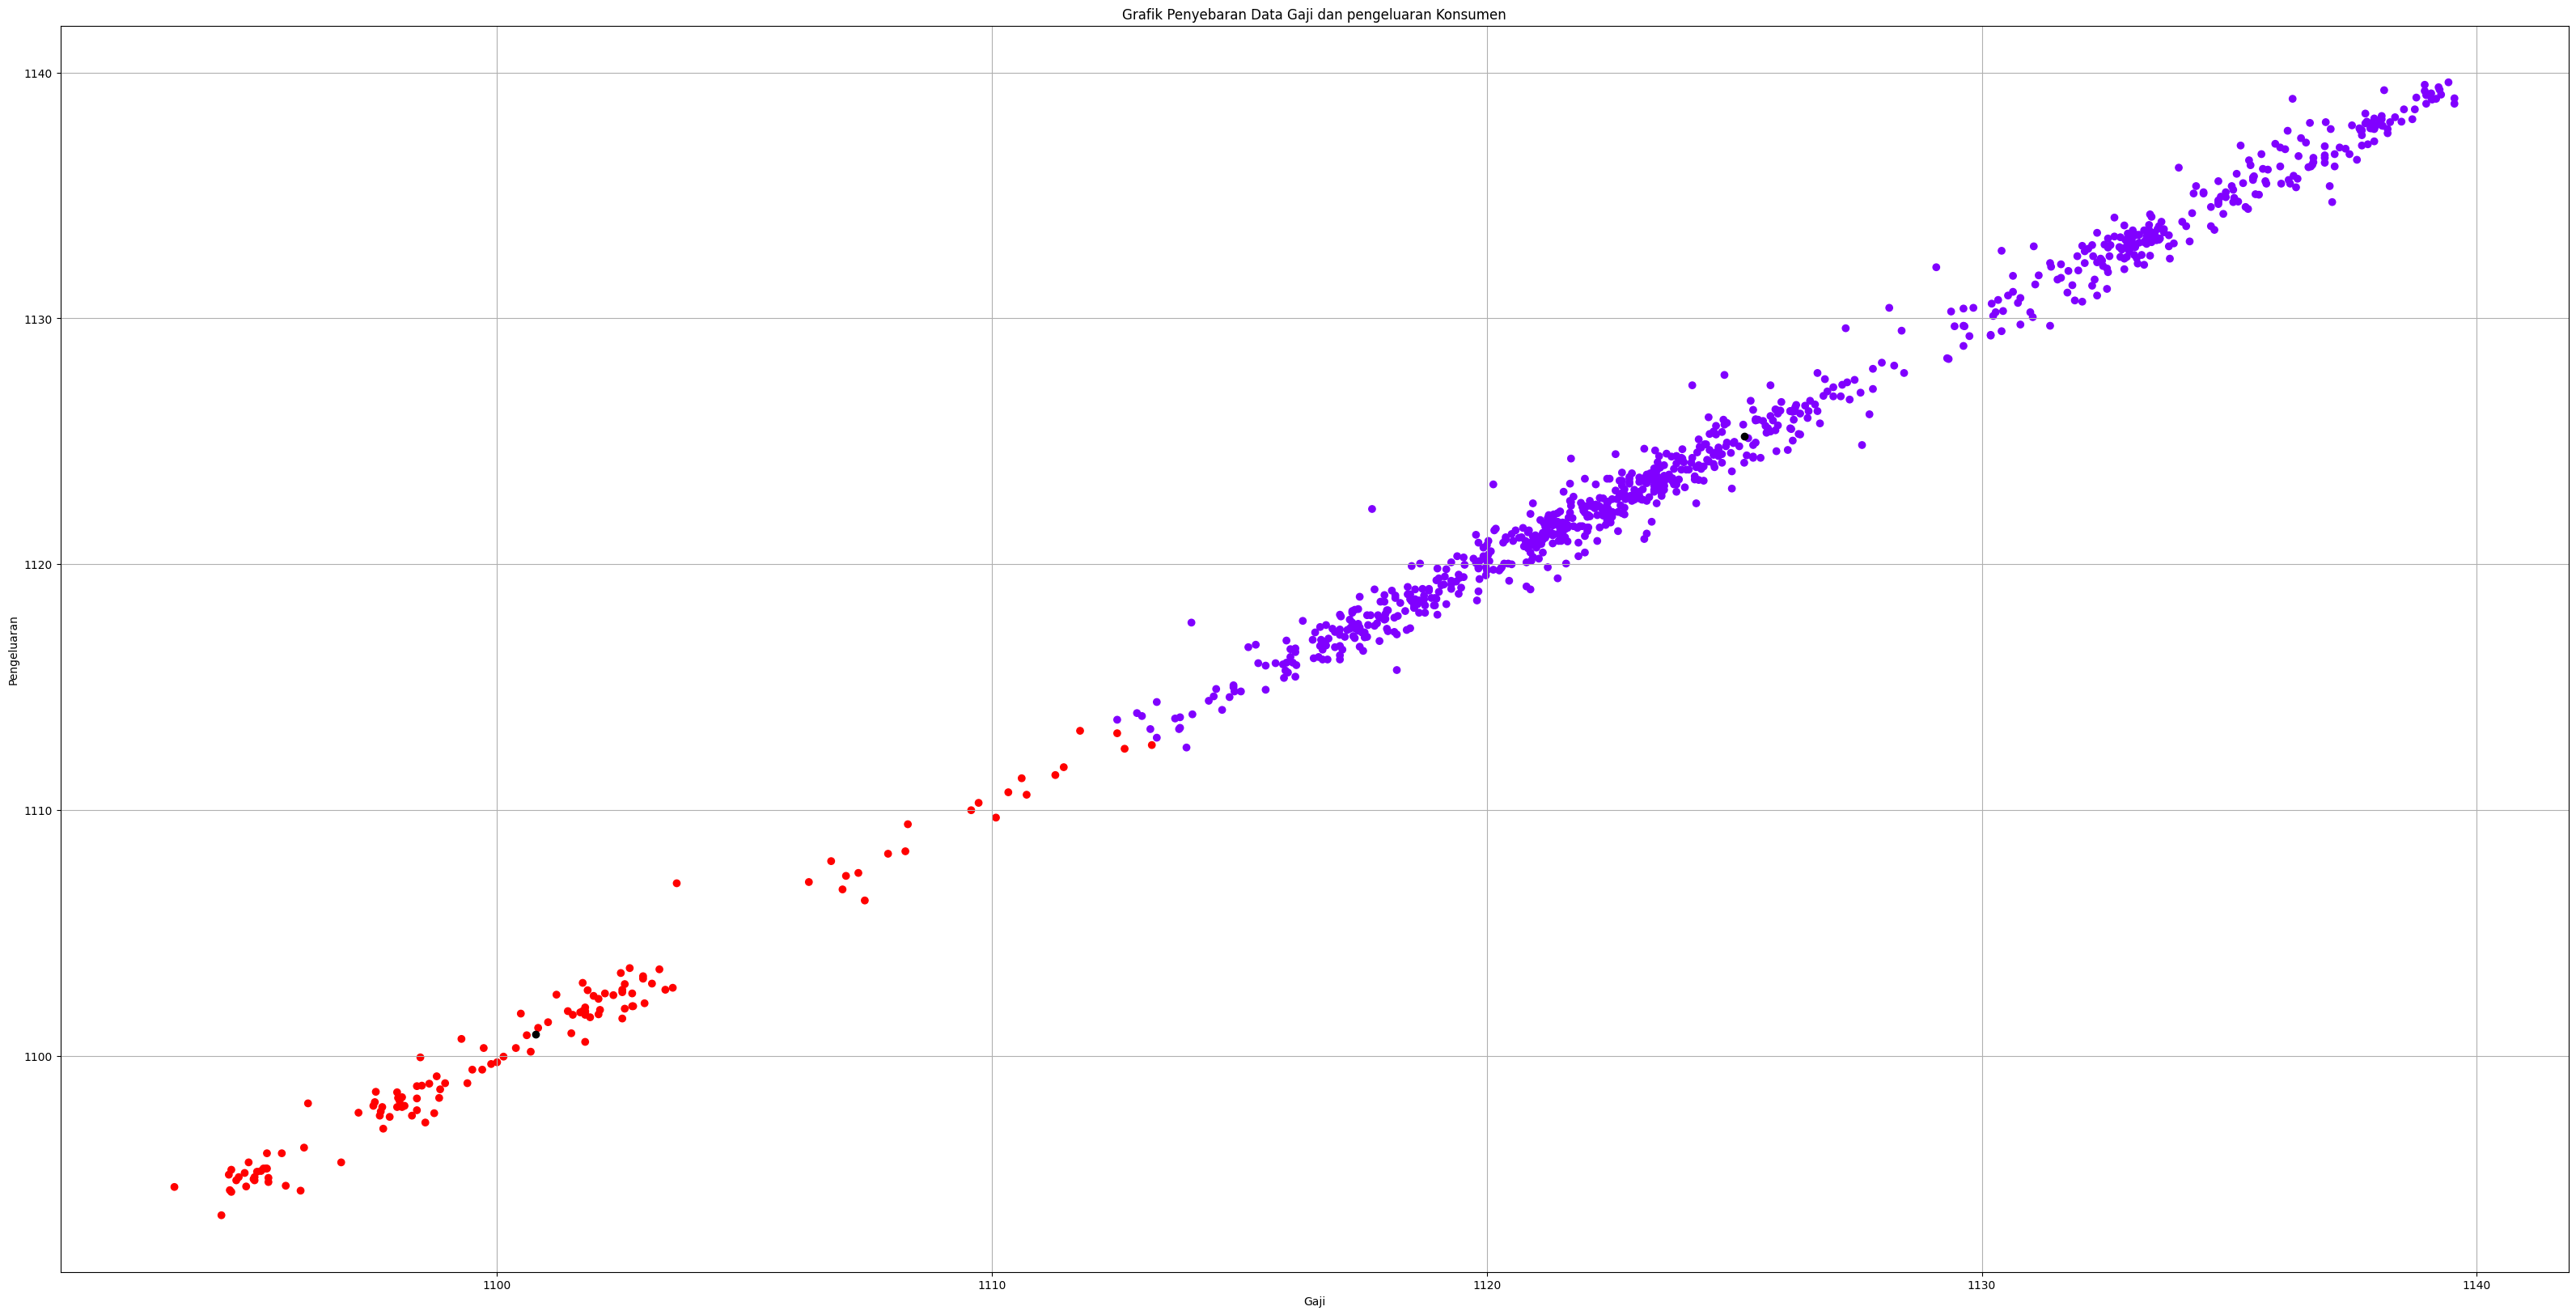

In [68]:
#plot Data point
# menvisualisasikan hasil klastering dengan centeroid dari masing masing klaster
plt.figure(figsize=(40,20))
plt.scatter(
    x[:, 0],
    x[:, 1],
    c=kmeans.labels_,
    cmap='rainbow'
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    color='black'
)
plt.xlabel('Gaji')
plt.ylabel('Pengeluaran')
plt.title('Grafik Penyebaran Data Gaji dan pengeluaran Konsumen')
plt.grid()
plt.show()